# **Project Name**    - **Netflix Movies & TV Clustering-Unsupervised Learning**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


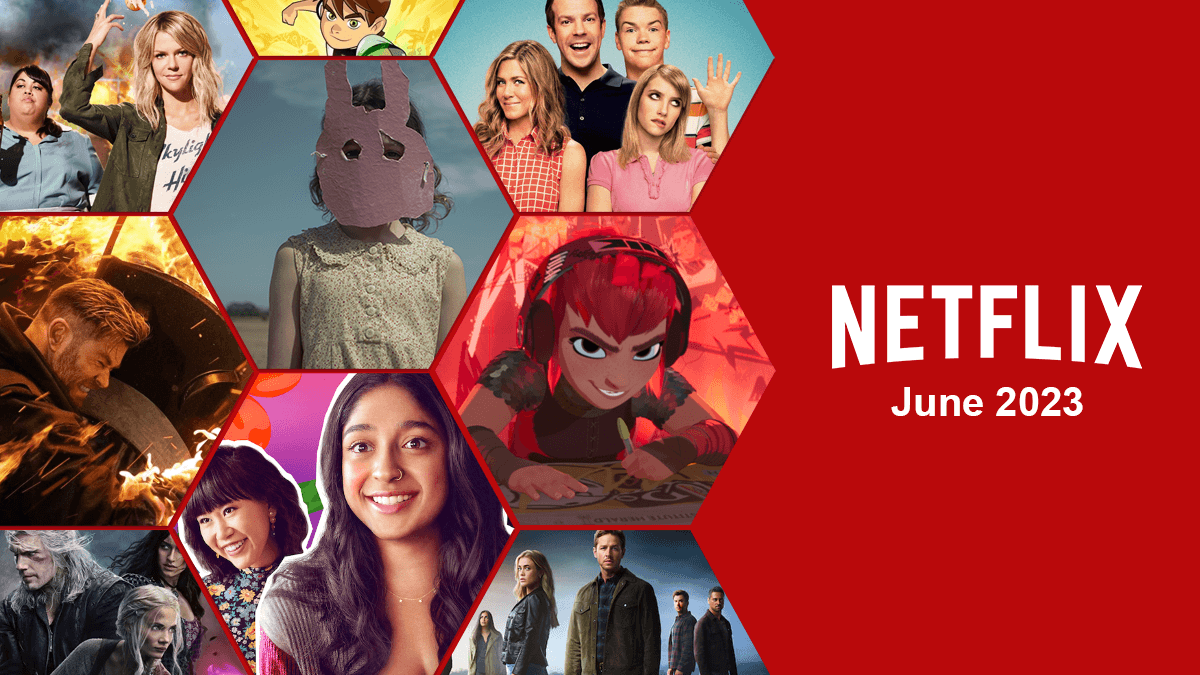

# **Project Summary -**

The objective of this project is to analyze and cluster a dataset related to Netflix. **The aim is to explore patterns and similarities among the content available on the platform and group them into meaningful clusters.**

The dataset will be preprocessed by handling the missing values, removing irrelevant columns, and transforming categorical variables into numerical representations. Features enginerring techniques may also be applied to extract useful information from the existing attributes.

Data analysis techniques will be utilized to gain insights into the dataset. **Visualizations and statistical summaries will be used to understand the distribution of variables.**

Once the dataset has been throughly analyzed, clustering algroithms will be employed. These algorithms will group similar Netflix shows and Movies together based on their attributes. **The optimal number of clusters will be determined using technique like the elbow method.**



# **GitHub Link -**

https://github.com/Vipiz99/EDA-Netflix-Movies-and-TV-Clustering

# **Problem Statement**


**This dataset contains of tv shows and movies available on Netflix as of 2019. The dataset is collected from Fixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of  TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titlessince 2010, whhile its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.
Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime as dt
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po
import plotly.io as pio

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata

import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from collections import Counter
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install -U Kaleido

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3. EDA Unsupervised Machine Learning/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.index

In [ ]:
df.columns

In [ ]:
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

In [ ]:
# Visualizing the missing values
df.isnull().sum().sum()

In [ ]:
#handling null values
df['cast'].fillna(value='No cast', inplace = True)
df['country'].fillna(value=df['country'].mode()[0], inplace=True)

In [ ]:
df.shape

### What did you know about your dataset?

This dataset contain information about various TV shows and movies available on Netflix, including details like the release year, rating, genre, etc. This data contains the 12 columns and 7787 rows.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe(include='all')

### Variables Description

**1. show_id** - This is uniques ID for every Movie/TV show

**2. type** - Identifier - A Movie or TV Show

**3. title** - Titile of the movie/show

**4. director** - Name of the director of the show

**5. cast** - Actors involved

**6. Country** - Countyr of production

**7. date_added** - Date it was added on Netflix

**8. release_year** - Actural release year of the show

**9. rating** - TV rating of the show

**10. duration** - Total duration in minutes or number of seasons

**11. listed_in** - related to which Genre

**12. Description** - The summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(df.apply(lambda col: col.unique()))

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# storing the date, day, month and year seperately
df["date_added"] = pd.to_datetime(df['date_added'])
df["day_added"] = df['date_added'].dt.day
df["year_added"] = df['date_added'].dt.year
df["month_added"] = df['date_added'].dt.month

### What all manipulations have you done and insights you found?

The manipulations that I have done:
**1. Handled some missing values in the column Director, Country, Casts and Date Added.**
**2. Extracted the additional information from Date Added column such as day, month and year.**






## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
labels = ['TV Show', 'Movie']
values = [df.type.value_counts()[1], df.type.value_counts()[0]]
colors = ['#ffd700', '#008000']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])

fig.update_layout(
    title_text='Type of Content Watched on Netflix',
    title_x=0.5,
    height=500,
    width=500,
    legend=dict(x=0.9),
    annotations=[dict(text='Type of Content', font_size=20, showarrow=False)]
)

fig.update_traces(marker=dict(colors=colors))

##### 1. Why did you pick the specific chart?

**This chart is effective in visualizing the distribution of categorical data. This chart shows the types of content watched on Netflix which are categorized as "TV SHows" and "Movie".**

##### 2. What is/are the insight(s) found from the chart?

**This chart shows the 69.1% content watched is Movies and the 30.9% is TV shows.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**This data shows the preference of the watchers for both TV shows and the Movies. So, we can analyse that which stuff is liked by the customers.**

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
# creating a dataframe to store month values and counts
months_df = pd.DataFrame(df['month_added'].value_counts())

# reset the index to  createb a "month" column
months_df.reset_index(inplace=True)

#Rename the columns to "month" and "count"
months_df.rename(columns={'index': 'month', 'month_added': 'count'}, inplace=True)

In [ ]:
fig=px.bar(months_df, x="month", y="count", text_auto=True, color='count', color_continuous_scale=['#0000FF', '#FFFF00'])
fig.update_layout(
    title={
        'text': 'Month wise Addition of Movies and TV Shows on Netflix',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    autosize=False,
    width=1000,
    height=500,
    showlegend=True)
fig.show()

##### 1. Why did you pick the specific chart?

**Because the bar chat is suitable for comparing and displaying categorical data and their corresponding counts. The chart helps in understanding the distribution of content additions across different months and identifying and patterns or trends.**

##### 2. What is/are the insight(s) found from the chart?

**The number of movies and Tv shows are high during the month from October to December.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, this insight hepl in creating a positive business impact as we can analyse the Meeting of Seasonal Demand, Retaining Existing Subscribers and Attracting New Subscribers.**

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='month_added', hue='type', lw=5, data=df, ax=ax,palette=['#FF0000', '#0000FF'])

##### 1. Why did you pick the specific chart?

**The coutplot shows the best compare of frequencies of TV shows and Movies additions for each month.**

##### 2. What is/are the insight(s) found from the chart?

**Jan, OCt and Dec seems to be the trending months for movie additons on Netflix amongst the other months.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**This insights help in creating a positive business impact as we can analyze the capitalizing and the seasonal trends by the insights.**

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
tv_show = df[df["type"]=="TV Show"]
movie = df[df["type"]=="Movie"]

col="year_added"

content_1 = tv_show["year_added"].value_counts().sort_index()
content_2 = movie["year_added"].value_counts().sort_index()

trace1 = go.Scatter(x=content_1.index, y=content_1.values, name="TV Show", marker=dict(color='#008000', line=dict(width=4)))
trace2 = go.Scatter(x=content_2.index, y=content_2.values, name="Movies", marker=dict(color='#ffd700', line=dict(width=4)))

fig=go.Figure(data=[trace1, trace2], layout=go.Layout(title="Content added over the year", title_x=0.5, legend=dict(x=0.8)))
fig.show()

##### 1. Why did you pick the specific chart?

**Because, the line chart is suitable for showing the trend and distribution over a continous axis.**

##### 2. What is/are the insight(s) found from the chart?

**This visualization indicates that between 2008 to 2022 were relatively fever TV shows and movies added to netfilx. But, starting of 2016, there was a slight increase in content additions.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, this insights help in creating a positive business impact we can analyse that how Netflix as the deamnd for both TV shows and movies on the platform has been increasing rapidly over the years.**

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
# distribhution of TV Shows
plt.figure(figsize=(20,8))
plt.title("Distribution of TV Shows duration", fontweight='bold')
sns.countplot(x=tv_show['duration'], data=tv_show, order = tv_show['duration'].value_counts().index)

##### 1. Why did you pick the specific chart?

**Because, this chart shows the frequency or count of each category in a categorical variable.**

##### 2. What is/are the insight(s) found from the chart?

**This chart shows that the majority of TV Shows have only one season, while the reamining shows hava maximum of two, three, four or five seasons.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, this insight helps in creating a positive business impact because by recognizing that the majority of TV shows have a limited number of seasons, content producers and streaming platforms can optimize their production planning.**

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
movie['originals'] = np.where(movie['release_year']==movie['year_added'], 'Yes', 'No')
fig, ax = plt.subplots(figsize=(5,5), facecolor='#660066')
ax.patch.set_facecolor("#660066")
explode = (0, 0.1)
ax.pie(movie['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels=['Others', 'Originals'],
       shadow=True, startangle=90, textprops={'color':"blue", 'fontsize': 25}, colors=['red', '#F5E9F5'])

##### 1. Why did you pick the specific chart?

**Because, pie plot is suitable for visualizing the distribution fo categorical data such as the proportion of 'originals' and 'others' in this case.**

##### 2. What is/are the insight(s) found from the chart?

This pie plot shows that the 30% are the Netfliz originals, while the remaining **70% are moives that were released earlier through different distribution channels.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, this insights can help in creating a positive business impact by streaming service can make informed decisions about content acquisition and produciton.**

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
# Seperating actors from cast column
cast = df['cast'].str.split(',', expand=True).stack()

#top actors who play highest role in movie/show
cast.value_counts()


In [ ]:
cast=cast[cast!= 'No cast']
cast.value_counts()

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))

#seperating TV shows actor from cast column
top_TVshows_actor = df[df['type']=='TV Show']['cast'].str.split(',', expand=True).stack()
top_TVshows_actor = top_TVshows_actor[top_TVshows_actor != 'No cast']

# plotting actor who appeared in highest number of TV show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0], color='Cyan')
a.set_title('Top 10 TV Shows actors', size=15)

#seperating Movies actor from cast columnn
top_movie_actor = df[df['type']=='Movie']['cast'].str.split(',', expand=True).stack()
top_movie_actor = top_movie_actor[top_movie_actor != 'No cast']

# plotting actor who appeared in highest number of movies
a = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1], color='red')
a.set_title('Top 10 Movie actors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

##### 1. Why did you pick the specific chart?

**Because, the horiontal orientation of bars shows best the comparison of values. The length of each bar represents the number of TV Show/movies an actor has appeared in.**

##### 2. What is/are the insight(s) found from the chart?

**Takahiro Sakurai is the actor who appear in the highest TV shows. Anupam Kher is the actor who appear in the highest Movies.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, this insights help in creating a positive business impact as the above insights producers can analyse that whom they appoint the actor for movie and TV shows seperately.**

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
top_10_Genre = df['listed_in'].value_counts().head(10)

fig2 = px.pie(top_10_Genre,values=top_10_Genre.values, names=top_10_Genre.index)

custom_colors= ['#4c78ab', '#72b7b2', '#ff7f0e', '2ca02c', '#d62728']
fig2.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', rotation=0,
                   marker=dict(colors=custom_colors))

fig2.update_layout(height=600, width=900, title='Top 10 Genres on Netflix',
                   margin=dict(t=100, b=30, l=0, r=0),
                   showlegend=False,
                   plot_bgcolor='#fafafa',
                   paper_bgcolor='#fafafa',
                   title_font=dict(size=20, color='#555', family="Lato, sans-serif"),
                   font=dict(size=12, color='#FF0000'),
                   hoverlabel=dict(bgcolor='#444', font_size=13, font_family="Lato, sans-serif"))

fig2.show()

##### 1. Why did you pick the specific chart?

**This pie chart is useful to see the percentage values outside the slices provide additional information and enhance the readability of the chart.**

##### 2. What is/are the insight(s) found from the chart?

**This insight shows that, the Documentaries is the highest in the Genres with 14.4%, second highest is Stand-up Comedy with 13.9% and the thrid highest are Drama and International Movies with 13.8%.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, this ingsiht helps in creating a positive business impact by focusing on genres that have high viewer demand. It can guide the productions in identifying genres that are in high demand.**

#### Chart - 9

In [ ]:
#Chart - 9 visualization code
# number of unique values
df['release_year'].nunique()

In [ ]:
print(f'Oldest release year: {df.release_year.min()}')
print(f'Laresr release year: {df.release_year.max()}')

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(17, 5))

#Univariate analysis
hist=sns.distplot(df['release_year'], ax=ax[0], kde=False, color='green')
hist.set_title('Distribution by release year', size=16)

#Bivariate analysis
count = sns.countplot(x='release_year', hue='type', data=df, order=df['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('Movie/TV SHows releases in top 15 years', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**These both above charts are combination of a histogram and a grouped bar plot allows for both univariate and bivariate analysis. The histogram provides an overview of the distribution of movie release years, while the bar plot allows for a comparison of number of movies and Tv shows releases in the top 15 years.**

##### 2. What is/are the insight(s) found from the chart?

**The distribution of release years in the histogram shows a general trend of movies being released on Netflix starting from around 1980. the number of releases gradually increases, with significant growth observed from the year 2000 onwards.**

**The Bar graph shows that 2017 and 2020 demonstrate the highest trend.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, this insights can help in creating a positive business impact. By understanding the distribution of release years and identifying trens.**

#### Chart - 10

In [ ]:
#chart 10 visualization code
#Rating
df.rating.nunique()

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top 10 rating for different age groups on Movie and TV Shows',
             weight = 'bold', y=1.02, size=18)

#univariate analysis
sns.countplot(x = 'rating', data=df, order=df['rating'].value_counts().index[0:10], ax=ax[0])

#bivariate analysis
graph = sns.countplot(x="rating", data=df, hue='type', order=df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

**TV-MA: shows that the content is intended for mature audiences only.**
** In terms of ratings, the most commong rating is TV-MA whic applies to both movies and TV shows.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, these insights are help in creating a positive business impact for both moives and TV shows can inform content strategies, audience targeting and programming decisions.**

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
import folium

# creating a map object
fig = folium.Map(location=[20, 0], zoom_start=2, titles='stamenterrain')

# dictionary of country names, coordinates and colors
countries = {'United States': {'coords': [37.0902, -95.7129], 'color': 'red'},
             'India': {'coords': [20.5937, 78.9629], 'color': 'green'},
             'United Kingdom': {'coords': [55.3781, -3.4360], 'color': 'blue'},
             'Canada': {'coords': [56.1304, -106.3468], 'color': 'orange'},
             'Japan': {'coords': [36.2048, 138.2529], 'color': 'purple'},
             'France': {'coords': [46.2276, 2.2137], 'color': 'pink'},
             'Sount Korea': {'coords': [35.9078, 127.7669], 'color': 'grey'},
             'Spain': {'coords': [40.4637, -3.7492], 'color': 'black'},
             'Mexico': {'coords': [23.6345, -102.5528], 'color': 'black'}}

# Loop over the dictionary and add markers for each country
for country, info in countries.items():
  folium.Marker(location=info['coords'], tooltip=country,
                popup=f"Color: {info['color']}",
                icon=folium.Icon(color=info['color'])).add_to(fig)

fig

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
# Replace null values in director
df['director']=df['director'].fillna('')

#creating a data frame with director counts
director_list=df.director.value_counts().reset_index().head(15)[1:]
director_list.rename(columns={'index':'Directors name', 'director': 'Count'}, inplace=True)

#Create a bar chart using plotly
fig = px.bar(director_list, x = 'Directors name', y='Count', text_auto=True)

#Generate a list of 25 unique color codes by seaborn
color_palette = sns.color_palette('bright', n_colors=15).as_hex()
fig.update_traces(marker_color = color_palette)

#Add a title and adjust the layout
fig.update_layout(
    title={
        'text': 'Top 25 directors with highest number of Movies and Tv Shows.',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    autosize = False,
    width = 1200,
    height = 500

)
fig.show()

In [ ]:
director_list


##### 1. Why did you pick the specific chart?

**This chart presents the data in an intuitive and visually appealing manner, allowing viewer to easily identify the directors with the most contribution on Netflix.**

##### 2. What is/are the insight(s) found from the chart?

**The directors Raul Campos and Jan Suter have the highest count in terms of overall Movies and Tv shows on Netflix.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, This insight can help in creating a positive business impact as the producers can analyse which director can give them a higher revenue.**

#### Chart - 13

In [ ]:
# Chart - 13 visualization code
df['listed_in'].value_counts().head(25)

In [ ]:
counts = df['listed_in'].value_counts().head(10)
average = counts.mean()

ddf = pd.DataFrame({'Category': counts.index, 'Count': counts.values})
colors = px.colors.qualitative.Dark24[:10]
fig = px.bar(ddf, x='Category', y = 'Count', color='Category', color_discrete_sequence=colors)
fig.add_hline(y=average, line_color='red')
fig.update_layout(title='Top 10 Average Genre with Count', title_x=0.3)

fig.show()


##### 1. Why did you pick the specific chart?

**Because, this chart is the best fit for represents the data, allowing viewers to easily compare the average count of different genre.**

##### 2. What is/are the insight(s) found from the chart?

**Documentaries, Stand-up Comedy and Dramas are the top three genres on the Netflix.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, this gained insight can help in creating a positive business impact. By this insight, Netflix can refine their content strategies, enhance viewer satisfaction and attract a larger audience.**

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code


In [ ]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['rating'].replace(rating_map, inplace=True)
df['rating'].unique()

In [ ]:
df['principal_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['principal_country'].head()

In [ ]:
country_order = df['principal_country'].value_counts()[:11].index
content_data=df[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T/content_data['sum']).T[['Movie', 'TV Show']].sort_values(by = 'Movie', ascending=False)[: :-1]

In [ ]:
df['count'] = 1
data = df.groupby('principal_country')[['principal_country','count']].sum().sort_values(by = 'count', ascending=False).reset_index()[: 10]
data = data['principal_country']

Flix_df_heatmap = df.loc[df['principal_country'].isin(data)]
Flix_df_heatmap = pd.crosstab(Flix_df_heatmap['principal_country'], Flix_df_heatmap['rating'], normalize = 'index').T
Flix_df_heatmap

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']

age_order = ['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']

sns.heatmap(Flix_df_heatmap.loc[age_order, country_order2], cmap="jet", square = True, linewidth=2.5, cbar=False,
            annot=True, fmt = '2.0%', vmax=.6, vmin=0.05, ax=ax, annot_kws={"fontsize" :15})
ax.spines['top'].set_visible(True)

fig.text(.76,.765, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15, ha = 'right')
ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serlf', rotation=0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serlf', rotation=90, fontsize=11)

ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both', length=0)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**A heatmap is a suitable choice when visualizing the relationships between two categorical variables. This heat map shows the relation between countriesa and age groups.**

##### 2. What is/are the insight(s) found from the chart?

**Spain stands out with the highest percentage of adults showing interest at 84%. This indicates a strong interest in the subject among adults in Spain.**

**1. France** - 68% of adults expressing interest, demonstrating a significant level of engagement in the subject.

**2. India** - It has the highest percentage of interest among teenagers, with 57% showing interest. This suggests a notable interest among the younger population in India.

**3. United Kingdom** - It has a relatively high level of interest among adults, with 51% expressing interest.

**4. Mexico**- Demonstrates a substantial level of interest, with 77% of adults showing interest in the subject.

**5. South Korea, United States** - Both have 47% of adults showing interest, indicating a moderate level of engagement in these countries.

**6. Japan** - Shows moderate level of interest among both adults and teens, with 36% of each group expressing interest.

**7. Canada** - It has the lowest percentage of interest among the listed countries, with 45% of adults showing interest.

#### Chart - 15

In [ ]:
rating = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['target_ages'] = df['rating'].replace(rating)

In [ ]:
df['count'] = 1
data2 = df.groupby('listed_in')[['listed_in', 'count']].sum().sort_values(by = 'count', ascending = False).reset_index()[: 10]
data2 = data2['listed_in']

In [ ]:
data2

In [ ]:
df_heatmap1 = df.loc[df['listed_in'].isin(data2)]
df_heatmap1 = pd.crosstab(df_heatmap1['listed_in'], df_heatmap1['target_ages'], normalize = "index").T
df_heatmap1

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

top = ['Documentaries', 'Stand-Up Comedy', 'Dramas, International Movies',
       'Comedies, Dramas, International Movies',
       'Dramas, Independent Movies, International Movies', "Kids' TV",
       'Children & Family Movies', 'Documentaries, International Movies',
       'Children & Family Movies, Comedies',
       'Comedies, International Movies']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap1.loc[age_order, top],
            cmap = 'YlGnBu',
            square = True,
            linewidth = 2.5,
            cbar = False,
            annot = True,
            fmt = '1.0%',
            vmax = .6,
            vmin = 0.05,
            ax = ax,
            annot_kws={"fontsize": 12})

plt.show()

##### 1. Why did you pick the specific chart?

**The heatmap is a suitable choice for this scenario because it allows me to represent the data using color encoding. The color intensity represents the frequency or proportion of movie genres within each age group.**

##### 2. What is/are the insight(s) found from the chart?

**The genre with the highest target audience of 89% adults is stand-up comedy. Children & Family Movies, Comedies also have a significant taget audience with 82%. Primarily catering to older kids, adults, kids & TV shows a tagret audience of around 66% and 53%**

#### Chart - 16

In [ ]:
# Chart 16 visualization code
country_count = df['country'].value_counts().sort_values(ascending=False)
country_count = pd.DataFrame(country_count)
topcountries = country_count[0:11]
topcountries

In [ ]:
data3 = dict(
    number=[3062, 923, 397, 226, 183, 177, 134, 115, 101, 100],
    country = ['United States', 'India', 'United Kingdom', 'Canada', 'Spain', 'Turkey', 'Phillippines', 'France',
               'South Korea', 'Australia']
)
fig = px.funnel(data3,
                x = 'number',
                y = 'country',
                title = 'Funnel Chart - Top 10 Countries by Number of Movies',
                labels = {'number': 'Number of Movies', 'country': 'Country'},
                color_discrete_sequence = px.colors.qualitative.Plotly,
                height = 1000,
                width = 900,
                template = 'plotly_dark')
fig.show()

##### 1. Why did you pick the specific chart?

**Funnel charts are often used to represent a gradual reduction in data as it moves through different stages or categories. This visualizes shows that the number of movies in the top 10 countries, showcasing the decreasing count from the top to the bottom.**

##### 2. What is/are the insight(s) found from the chart?

**This insight shows that the United States has the highest number of movies, with 3062 films, indicating a dominant presence in the film industry. India is the second-highest contributor with 923 movies, demonstrating a significant presence in the global Movies/TV shows market.**

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

In [ ]:
# copy of df_clean_frame
netflix_hypothesis = df.copy()

#head of df_hypothesis
netflix_hypothesis.head()

In [ ]:
#filtering movie from type column
netflix_hypothesis = netflix_hypothesis[netflix_hypothesis["type"] == "Movie"]

In [ ]:
rating_ages = {
    'TV-MA':'Adults',
    'R':'Adults',
    'PG-13':'Teens',
    'TV-14':'Young Adults',
    'TV-PG':'Older Kids',
    'NR':'Adults',
    'TV-G':'Kids',
    'TV-Y':'Kids',
    'TV-Y7':'Older Kids',
    'PG':'Older Kids',
    'G':'Kids',
    'NC-17':'Adults',
    'TV-Y7-FV':'Older Kids',
    'UR':'Adults'
}

netflix_hypothesis['target_ages'] = netflix_hypothesis['rating'].replace(rating_ages)
# Let's see unique target ages
netflix_hypothesis['target_ages'].unique()

In [ ]:
netflix_hypothesis['target_ages'] = pd.Categorical(netflix_hypothesis['target_ages'], categories = ['Kids', 'Older Kids', 'Adults', 'Teens'])

netflix_hypothesis['duration'] = netflix_hypothesis['duration'].astype(str)  #Convert to string type
netflix_hypothesis['duration'] = netflix_hypothesis['duration'].str.extract('(\d+)')
netflix_hypothesis['duration'] = pd.to_numeric(netflix_hypothesis['duration'])

netflix_hypothesis.head(3)

In [ ]:
#group_by duration and target_ages
group_by_ = netflix_hypothesis[['duration', 'target_ages']].groupby(by = 'target_ages')

#mean of group_by variable
group = group_by_.mean().reset_index()
group

In [ ]:
#In A and B variable grouping values
A = group_by_.get_group('Kids')
B = group_by_.get_group('Older Kids')

#mean and std. calculation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for kids {} \n Mean for movies rated for older kids {}'.format(M1, M2))
print('Std for movies rated for Older Kids {} \n Std for movies rated for kid {}'.format(S2, S1))

In [ ]:
#importing stats
from scipy import stats
#Length of groups and DOF
n1 = len(A)
n2 = len(B)

print(n1, n2)

dof = n1+n2-2
print('dof', dof)

sp_2 = ((n2-1)*S1**2 + (n1-1)*S2**2)/dof
print('SP_2=', sp_2)

sp = np.sqrt(sp_2)
print('SP', sp)

#tvalue
t_val = (M1-M2)/(sp*np.sqrt(1/n1 + 1/n2))
print('tvalue', t_val[0])


In [ ]:
#t-distribution
stats.t.ppf(0.025, dof)

In [ ]:
#t-distribution
stats.t.ppf(0.975, dof)

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

HO: Movies rated for kids and older kids are atleast two hours long.(Null Hypothesis).

H1: Movies rated for kids and older kids are not at least two hours long.(Alternate Hypothesis)

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
#t-distribution
stats.t.ppf(0.025, dof)

In [ ]:
#t-distribution
stats.t.ppf(0.975, dof)

Answer Here.

T-value is not in the range, the null hypothesis is rejected.
**As a result, movies rated for kids and older kids are not at least two hours long.**

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

H1: The duration which is more than 90 minutes are movies

hO: The duration which is movre than 90 minutes are not movies

#### 2. Perform an appropriate statistical test.

In [ ]:
#making copy of df_clean_frame
netflix_hypothesis = df.copy()
#head of df_hypothesis
netflix_hypothesis.head()

In [ ]:
netflix_hypothesis['duration'] = netflix_hypothesis['duration'].str.extract('(\d+)')
netflix_hypothesis['duration'] = pd.to_numeric(netflix_hypothesis['duration'])

In [ ]:
netflix_hypothesis['type'] = pd.Categorical(netflix_hypothesis['type'], categories=['Movie', 'TV Show'])
netflix_hypothesis.head()

In [ ]:
netflix_hypothesis['type'] = pd.Categorical(netflix_hypothesis['type'], categories=['Movie', 'TV Show'])


In [ ]:
# Perform Statistical Test to create to obtain P-value
#group_by duration and type
group_by_ = netflix_hypothesis[['duration', 'type']].groupby(by = 'type')

#mean of group_by variable
group1 = group_by_.mean().reset_index()
group1

In [ ]:
#In A and B variable grouping values
A = group_by_.get_group('Movie')
B = group_by_.get_group('TV Show')

#mean and std
M1 = A.mean()
S1 = A.std()

M2 = B.mean()
S2 = B.std()

print('Mean {}'. format(M1, M2))
print('Std {}'. format(S2, S1))

In [ ]:
#importing stats
from scipy import stats

#Length of groups and DOF
n1 = len(A)
n2 = len(B)
print(n1, n2)

dof = n1+n2-2
print('dof', dof)

sp_2 = ((n2-1)*S1**2 + (n1-1)*S2**2)/dof
print('SP_2', sp_2)

sp = np.sqrt(sp_2)
print('SP', sp)

#t-value
t_val = (M1-M2)/(sp*np.sqrt(1/n1 + 1/n2))
print('tvalue', t_val[0])


##### Which statistical test have you done to obtain P-Value?

t-distribution

In [ ]:
#t-distribution
stats.t.ppf(0.025, dof)

In [ ]:
#t-distribution
stats.t.ppf(0.975, dof)

**Answer Here**

Because the t-value is not in the range, the null hypothesis is rejected.

So, the duration which is more than 90 mins are movies.

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
#Combining all the clustering attributes into a single column
df['clustering'] = (df['director'] + '' + df['cast'] +'' +
                    df['country'] + '' + df['listed_in'] + '' +
                    df['description'])

In [ ]:
df['clustering'][25]

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import nltk
nltk.download('all', quiet=True)
from PIL import Image

def transform_text(text):
  #converting text to lowercase
  text = text.lower()

  #remove URLs
  text = re.sub(r'http\S+', '', text)

  #Tokenize text into words
  words = nltk.word_tokenize(text)

  #Remove non-alphanumeric characters
  words = [word for word in words if word.isalnum()]

  #Remove stopwords and punctuation
  stopwords_set = set(stopwords.words('english'))
  punctuation_set = set(string.punctuation)
  words = [word for word in words if word not in stopwords_set and word not in punctuation_set]

  #Lemmatize words
  lemmatizer = WordNetLemmatizer()
  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

  #Join words into a string and return
  return ' '.join(lemmatized_words)

In [ ]:
df['Clean_Text'] = df['clustering'].apply(transform_text)

In [ ]:
df["Clean_Text"][50]

#### 10. Text Vectorization

**TF-IDF combine two metricsf: Term frequency (TF) and inverse document frequency (IDF).**
Term Frequency (TF): This metric measures the frequency of a term in a document. It assumes that the more often a term appears in a document, the more relevant it is to that document. It is calculated using the formula:

**TF(t,d) = (Number of times term appears in document d)/ (Total number of terms in document d)**

**Inverse Document Frequency**

**IDF(t) = log_e.(Total number of documents/Number of documents contain term t)**

In [ ]:
bag_of_words =  df.Clean_Text

In [ ]:
t_vectorizer = TfidfVectorizer(max_features=20000)
X = t_vectorizer.fit_transform(bag_of_words)

In [ ]:
print(X.shape)

In [ ]:
t_vectorizer.get_feature_names_out()

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, Because PCA identifies the directions along which the data varies the most. These components are ordered by the amount of variance they explain the the dataset.

In [ ]:
# DImensionality Reduction (If needed)
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
transformer = PCA()

In [ ]:
PCA()

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

PCA can extract the most relevant features from a dataset. It transforms the original features into a new set of uncorrelated variables called principal componnents.

## ***7. ML Model Implementation***

In [ ]:

#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 30.
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()


In [ ]:

from sklearn.metrics import silhouette_score
#sillhoute score of clusters
sill = []
for i in range(2,30):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(X)
    y1 = model.predict(X)
    score = silhouette_score(X,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))

In [ ]:

#training the K-means model on a dataset
kmeans = KMeans(n_clusters= 26, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(X)

In [ ]:
#Predict the clusters and evaluate the silhouette score

score = silhouette_score(X, y_predict)
print("Silhouette score is {}".format(score))

In [ ]:

#Adding a seperate column for the cluster
df["cluster"] = y_predict

In [ ]:

df['cluster'].value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='cluster', hue='type',lw=5, color='red', data=df, ax=ax)


In [ ]:

# Add cluster values to the dateframe.
df['cluster_number'] = kmeans.labels_

In [ ]:

#Count the number of movies or TV shows in each cluster
cluster_content_count = df['cluster_number'].value_counts().reset_index().rename(columns={'index': 'clusters', 'clusters': 'Movies/TV_Shows'})

# Print the cluster content count
print(cluster_content_count)

In [ ]:
#word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def word_count(category):
  print("Exploring Cluster", category)
  col_names = ['type','title','country','rating','listed_in','description']
  for i in col_names:
    df_word_cloud = df[['cluster_number',i]].dropna()
    df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category]
    text = " ".join(word for word in df_word_cloud[i])
    # Create stopword list:
    stopwords = set(STOPWORDS)
  # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="#FFC0CB",width=500,height=500).generate(text)
  # Display the generated image:
  # the matplotlib way:
    plt.rcParams["figure.figsize"] = (10,10)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    print("Looking for insights from", i ,"Movies/TV Shows")

    plt.show()

In [ ]:
word_count(9)


Cluster 9 in a dataset contains a total of 232 words. The most frequently occurring words in this cluster are as follows:

**Type** - Movie & Tv shows

**Title** - Broadway,Remastered,Christmas ,Friends Orchestra

**Country**- United Kingdom,Argentina,United States,India

**Rating** -TV-MA,PG-TV

**Listed_in** - Dramas International,Musical Dramas,Musicial Documentaries,Comedies International

**Description**- Documentary ,Music,One,Bad,Tour ,Love.

In [ ]:
word_count(11)


Cluster 11 in a dataset contains a total of 231 words. The most frequently occurring words in this cluster are as follows:

**Type** - Movie & Tv shows

**Title** - Special, America,Time,Live,Comedy, Netflix Alive, Martin

**Country** - United States,Brazil,Mexico,Italy

**Rating** -TV-MA,TV-PG

**Listed_in** - Tv-Comedies, Comedy Stand, Talk shows

**Description**- Stand Comedy, Comic, Take, Life, Live, Share,Stories.

## ***8.*** ***Future Work (Optional)***

Integrating this dataset with external sources such as IMDB ratings,books clsutering ,Plant based Type clustering can lead to numerous intriguing discoveries.

By incorporating additional data, a more comprehensive recommender system could be developed, offering enhanced recommendations to users. This system could then be deployed on the web for widespread usage.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1- It is interesting to note that the majority of the content available on Netflix consists of movies. However, in recent years, the platform has been focusing more on TV shows.

2- Most of these shows are released either at the end or the beginning of the year.

3- The United States and India are among the top five countries that produce all of the available content on the platform. Additionally, out of the top ten actors with the maximum content, six of them are from India.

4- When it comes to content ratings, TV-MA tops the charts, indicating that mature content is more popular on Netflix.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***